In [1]:
import torch
import numpy as np

### 1. 视频内容

#### 1.1

In [2]:
in_channels, out_channels = 5, 10 # 本来是5个通道，要求输出是10个通道

In [3]:
width, high = 5, 10
kernel_size = 3 # 卷积核
batch_size = 1 

In [4]:
input = torch.randn(batch_size, in_channels, width, high) # CNN都是维度都是 B * C * W * H
input, input.shape

(tensor([[[[ 0.5353,  1.7383, -0.9667, -0.7027, -0.4228, -0.9564,  0.1883,
            -2.0709,  0.4374,  0.8694],
           [-0.6401,  0.9080,  0.8322, -2.2812, -0.9202,  0.4543,  0.6704,
             0.1788,  0.5588,  1.3682],
           [ 0.4135,  0.0695,  1.0331,  0.5664,  0.6319,  0.9728, -1.6338,
             0.1293, -1.3254,  0.3071],
           [ 0.0580, -0.7532,  1.4385,  0.1175, -0.3590, -0.1359, -0.3358,
            -1.4330, -0.8322, -0.1862],
           [-1.0531, -1.9226,  0.0726,  0.8720, -0.7352,  0.8931,  1.0600,
            -1.2491, -1.1599,  0.0127]],
 
          [[ 0.2186, -0.9966, -0.6763,  1.0910, -0.4975, -1.3681,  0.3743,
             0.3823, -0.3380, -0.2903],
           [-0.5216, -0.1794,  0.3021,  0.6462, -0.8430, -1.2276,  0.5617,
             0.2401, -0.1925,  0.6573],
           [-0.3247,  0.3541,  0.9420,  0.2788, -2.0588, -1.8150,  0.5732,
             1.2534, -2.6041,  1.9888],
           [ 0.3472, -0.7003,  0.0981, -0.7820, -0.1389, -0.1089,  2.4998,
  

### 每个卷积核的通道是和 输入的通道数是一样的

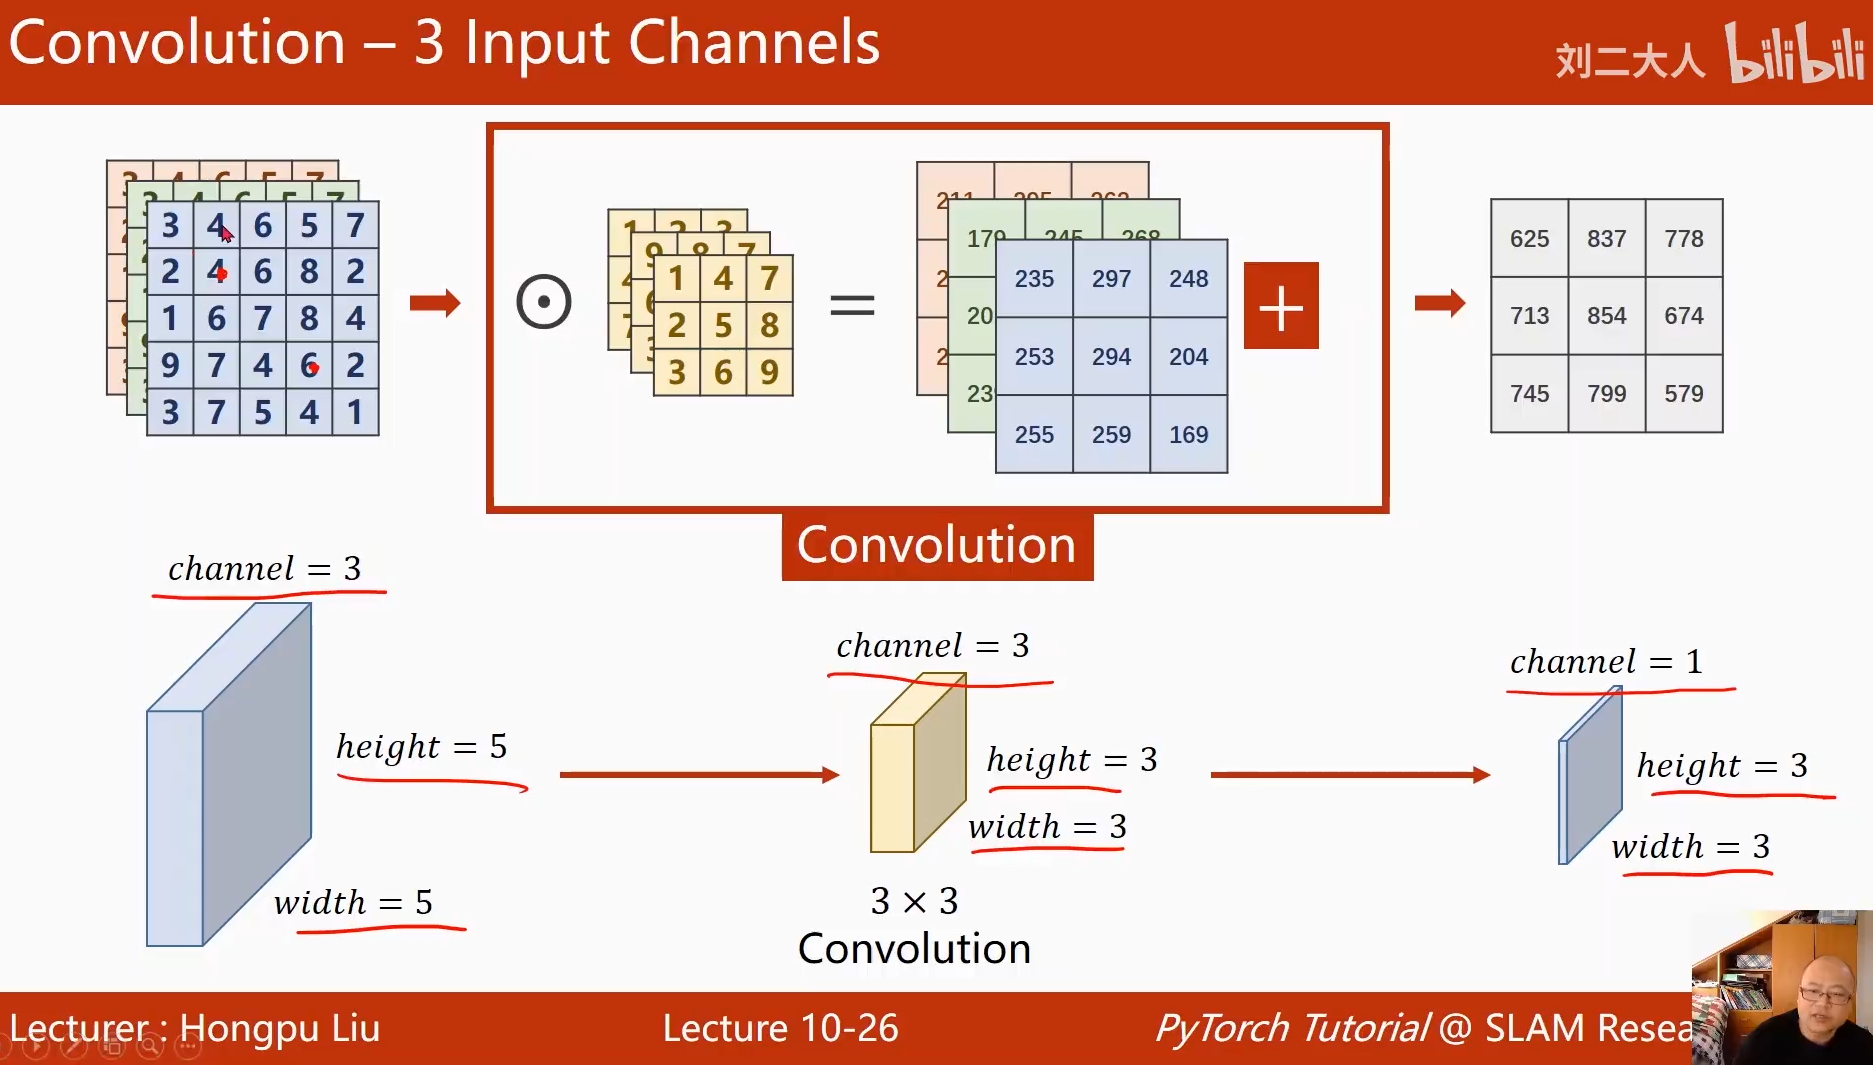

### 输出的通道数和卷积核的个数总和是一样多的

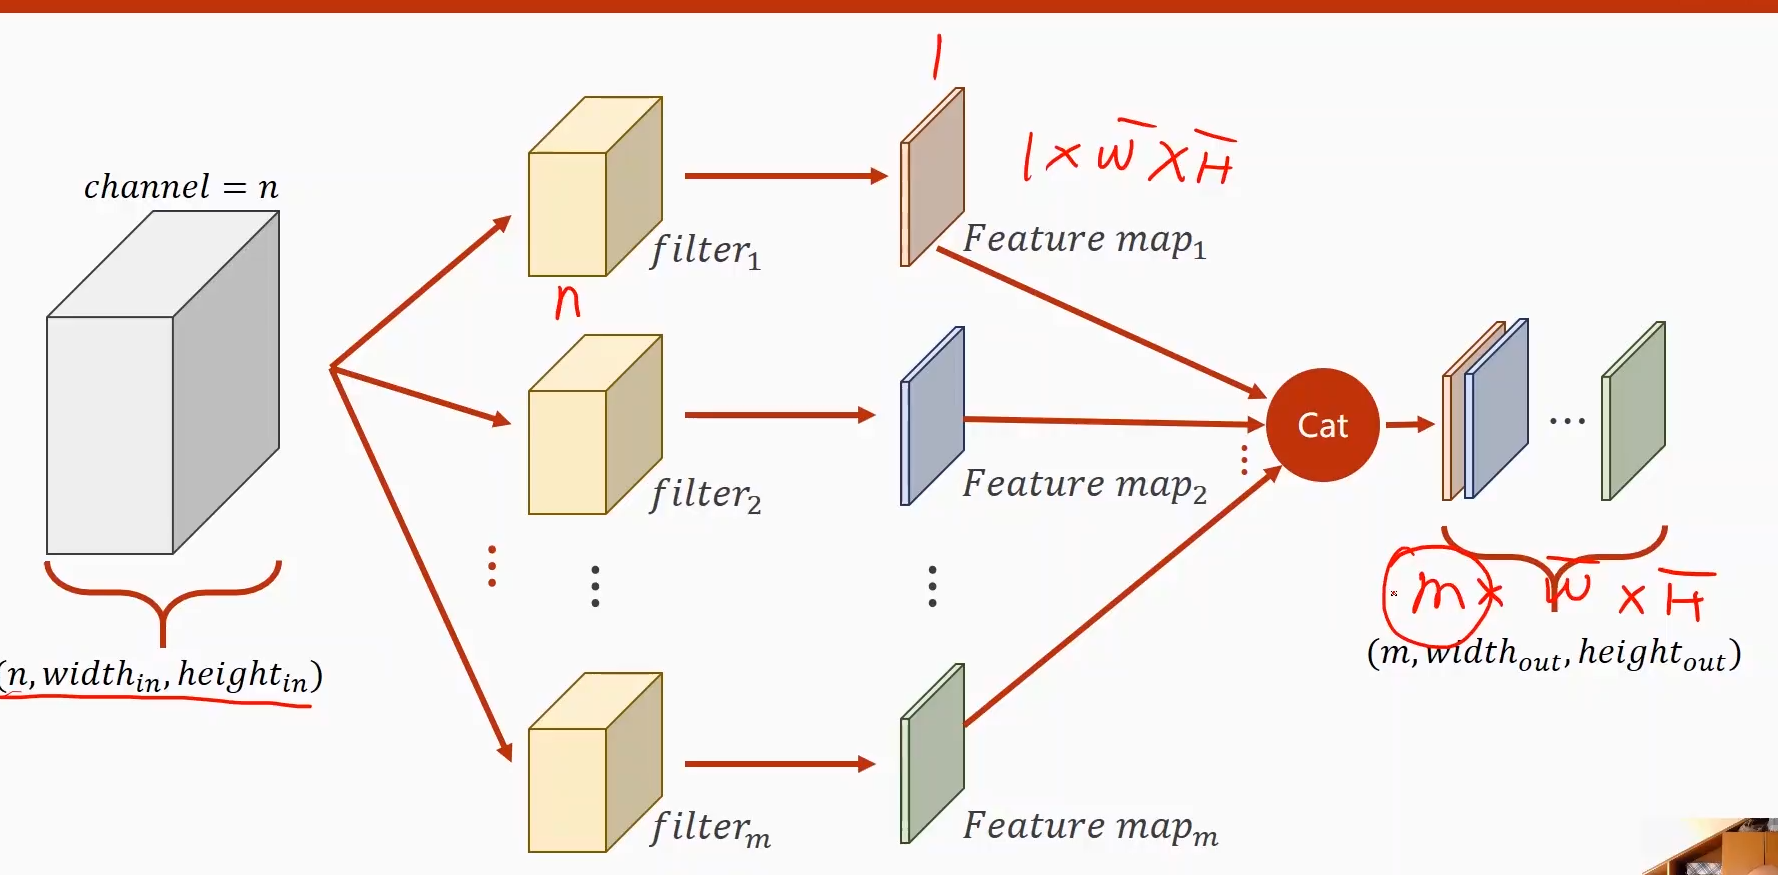

In [6]:
conv_layer = torch.nn.Conv2d(in_channels, out_channels, kernel_size = kernel_size)

In [7]:
output = conv_layer(input)
print(output.shape)

torch.Size([1, 10, 3, 8])


In [8]:
print(conv_layer.weight.shape)

torch.Size([10, 5, 3, 3])


#### 1.2 

In [27]:
import torch

In [28]:
input_1 = [3,4,6,5,7,
        2,4,6,8,2,
        1,6,7,8,4,
        9,7,4,6,2,
        3,7,5,4,1]

In [29]:
input_1 = torch.tensor(input_1, dtype = torch.float32).reshape(1, 1, 5, 5)
input_1

tensor([[[[3., 4., 6., 5., 7.],
          [2., 4., 6., 8., 2.],
          [1., 6., 7., 8., 4.],
          [9., 7., 4., 6., 2.],
          [3., 7., 5., 4., 1.]]]])

In [30]:
input_1.shape

torch.Size([1, 1, 5, 5])

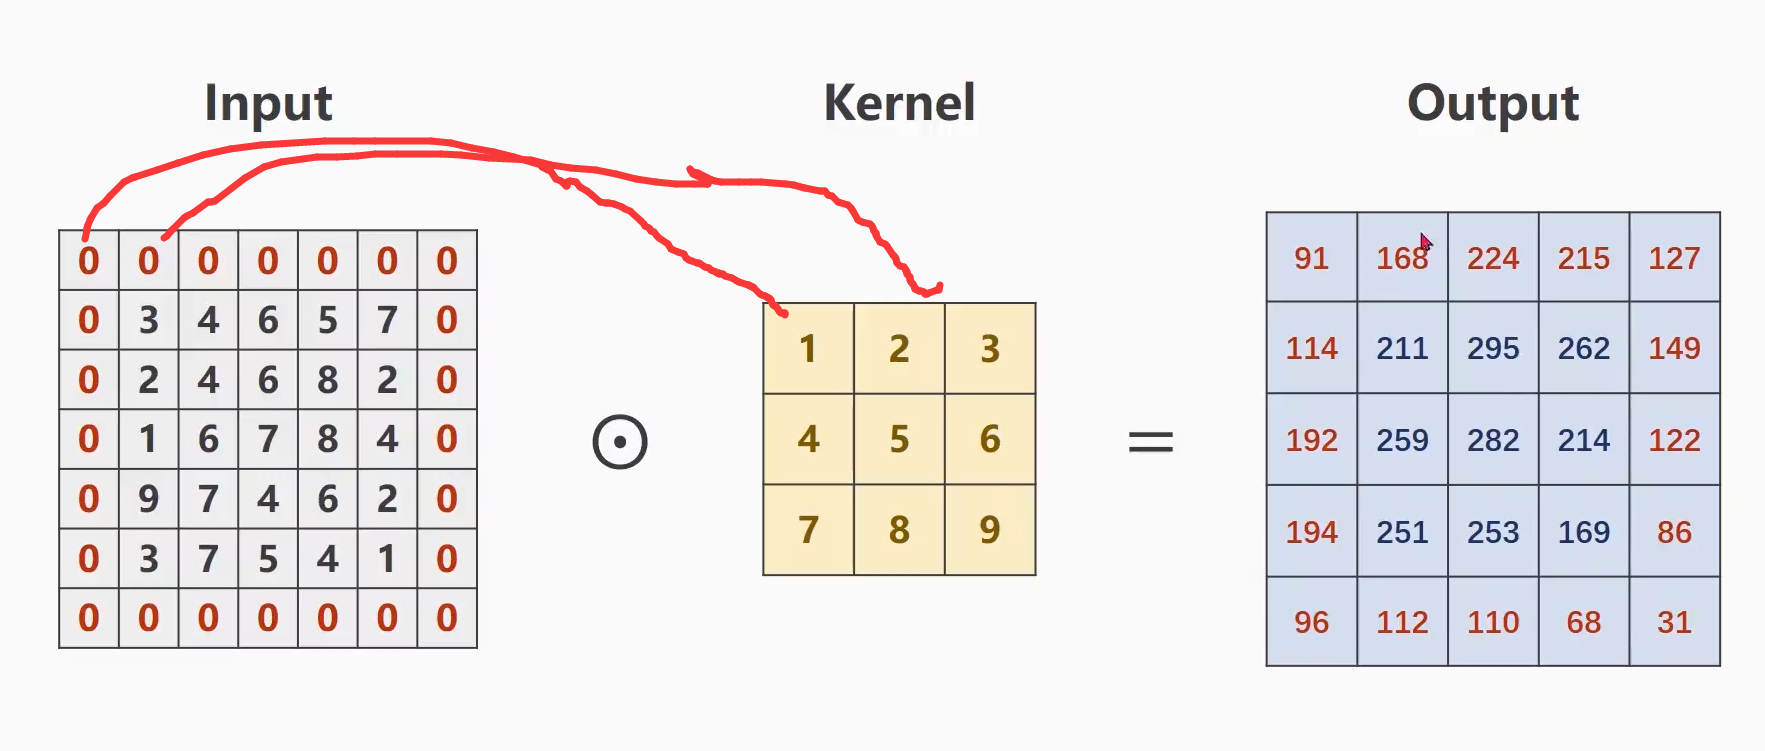

In [31]:
conv_layer = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)

In [32]:
kernel = torch.Tensor([1,2,3,4,5,6,7,8,9]).view(1, 1, 3, 3)
kernel

tensor([[[[1., 2., 3.],
          [4., 5., 6.],
          [7., 8., 9.]]]])

In [33]:
conv_layer.weight.data = kernel.data

In [34]:
output = conv_layer(input_1) # 这个是点乘，不是矩阵的乘法
print(output)

tensor([[[[ 91., 168., 224., 215., 127.],
          [114., 211., 295., 262., 149.],
          [192., 259., 282., 214., 122.],
          [194., 251., 253., 169.,  86.],
          [ 96., 112., 110.,  68.,  31.]]]], grad_fn=<ThnnConv2DBackward0>)


#### 1.3 stride

In [37]:
import torch
input_1 = [3,4,6,5,7,
        2,4,6,8,2,
        1,6,7,8,4,
        9,7,4,6,2,
        3,7,5,4,1]

In [38]:
input_1 = torch.tensor(input_1, dtype = torch.float32).reshape(1, 1, 5, 5)
input_1

tensor([[[[3., 4., 6., 5., 7.],
          [2., 4., 6., 8., 2.],
          [1., 6., 7., 8., 4.],
          [9., 7., 4., 6., 2.],
          [3., 7., 5., 4., 1.]]]])

In [39]:
input_1.shape

torch.Size([1, 1, 5, 5])

In [40]:
conv_layer = torch.nn.Conv2d(1, 1, kernel_size=3, stride = 2, bias=False)

In [41]:
kernel = torch.Tensor([1,2,3,4,5,6,7,8,9]).view(1, 1, 3, 3)
kernel

tensor([[[[1., 2., 3.],
          [4., 5., 6.],
          [7., 8., 9.]]]])

In [42]:
conv_layer.weight.data = kernel.data

In [43]:
output = conv_layer(input_1) # 这个是点乘，不是矩阵的乘法
print(output)

tensor([[[[211., 262.],
          [251., 169.]]]], grad_fn=<ThnnConv2DBackward0>)


#### 1.4 MaxPooling

In [44]:
import torch

In [45]:
input = [3,4,6,5,
2,4,6,8,
1,6,7,8,
9,7,4,6,
]

In [46]:
input = torch.tensor(input, dtype = torch.float32).view(1, 1, 4, 4)

In [47]:
input

tensor([[[[3., 4., 6., 5.],
          [2., 4., 6., 8.],
          [1., 6., 7., 8.],
          [9., 7., 4., 6.]]]])

In [48]:
maxpooling_layer = torch.nn.MaxPool2d(kernel_size=2)

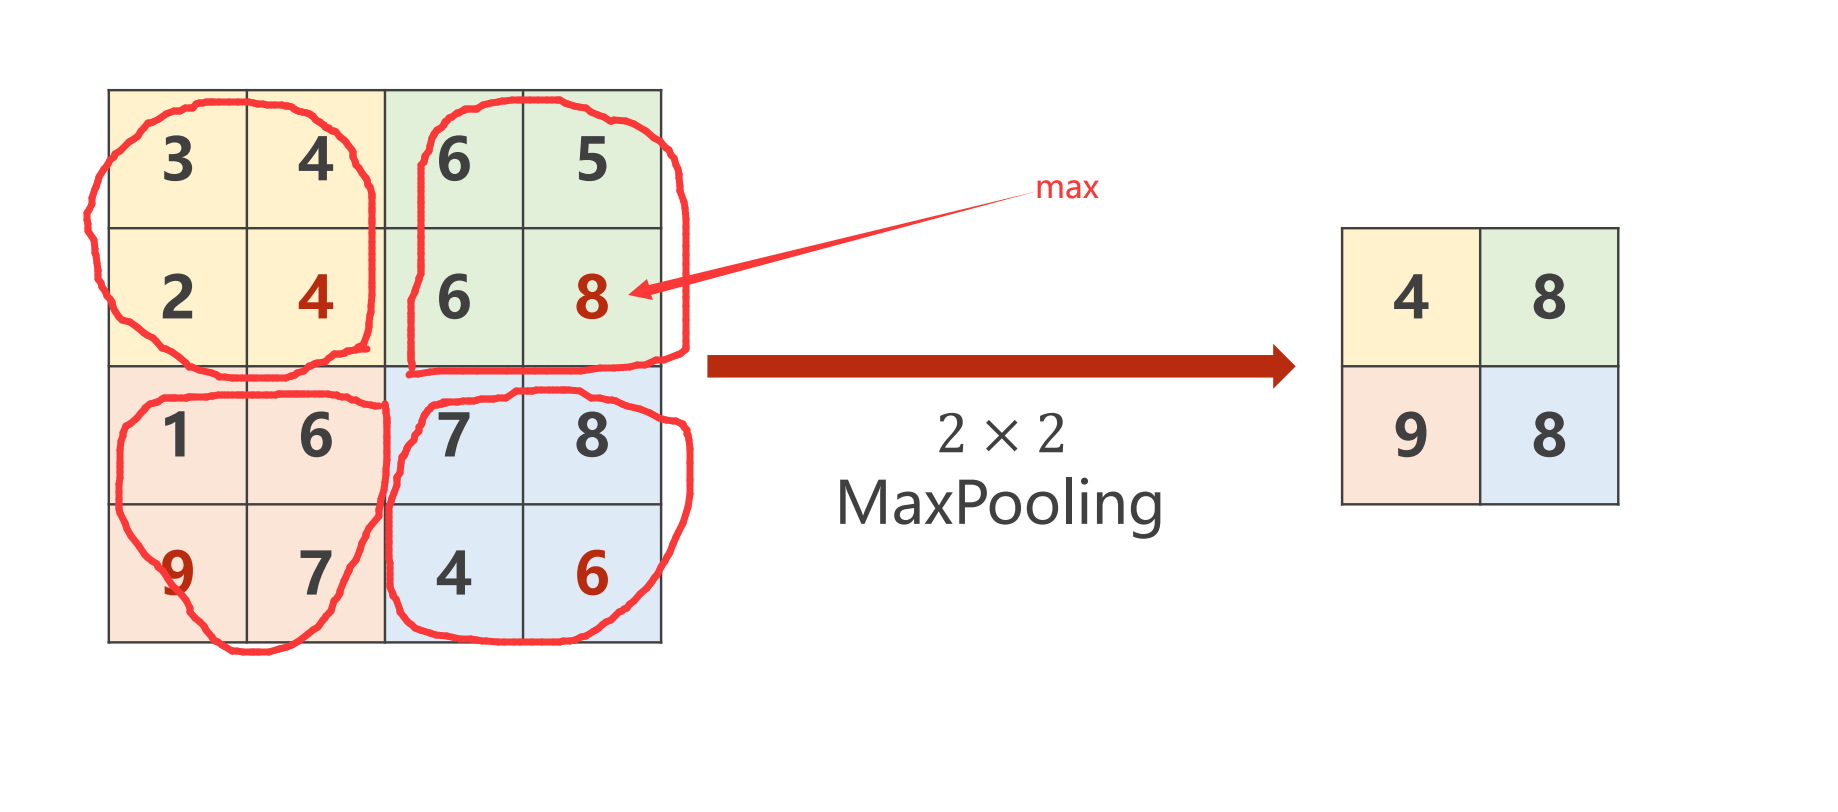

In [49]:
output = maxpooling_layer(input)
print(output)

tensor([[[[4., 8.],
          [9., 8.]]]])


#### 1.5 

In [118]:
import torch
import torch.nn.functional as F
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [119]:
batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307, ),(0.3081, ))
])

In [120]:
transform

Compose(
    ToTensor()
    Normalize(mean=(0.1307,), std=(0.3081,))
)

In [121]:
train_dataset = datasets.MNIST(root='../dataset/mnist/', train = True, download = True, transform = transform)
train_loader = DataLoader(train_dataset, shuffle = True, batch_size = batch_size)
test_dataset = datasets.MNIST(root='../dataset/mnist/', train = False, download = True, transform = transform)
test_loader = DataLoader(test_dataset, shuffle = False, batch_size = batch_size)

In [122]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [123]:
# 根据下面的构建神经网络

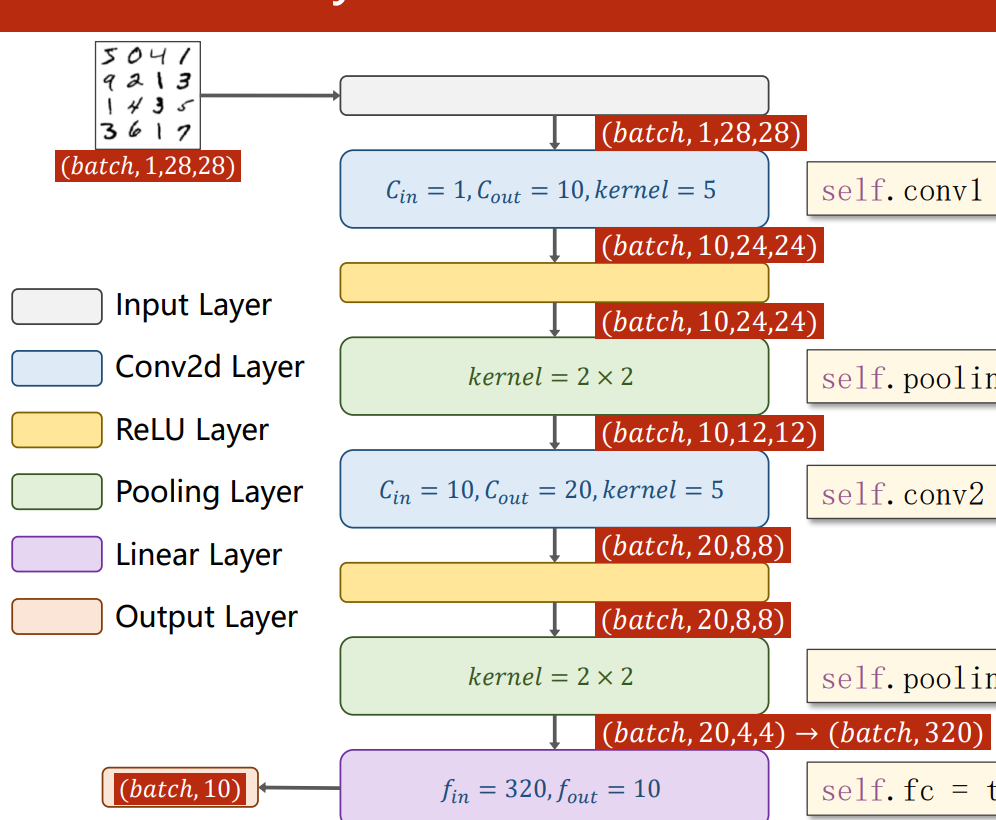

In [124]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5) # 输入通道 输出通道，卷积核
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.pooling = nn.MaxPool2d(2)
        self.fc = nn.Linear(320, 10)
            
    def forward(self, x):
        # # Flatten data from (n, 1, 28, 28) to (n, 784)
        batch_size = x.size(0)
        x = self.pooling(F.relu(self.conv1(x)))
        x = self.pooling(F.relu(self.conv2(x)))
        x = x.reshape(batch_size, -1)
        x = self.fc(x)
        return x

In [125]:
model = Net()

In [126]:
model

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=320, out_features=10, bias=True)
)

In [127]:
loss_value = nn.CrossEntropyLoss()
loss_value

CrossEntropyLoss()

In [128]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01 ,momentum = 0.5)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.5
    nesterov: False
    weight_decay: 0
)

In [129]:
for f, l in enumerate(train_loader):
    print(l)
    break

[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.42

In [130]:
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        features, labels = data
        optimizer.zero_grad()
        output = model(features)
        loss = loss_value(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0

In [131]:
acc_list = []
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim = 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_list.append(correct/total)
    print('accuracy on test set: %d %% ' % (100*correct/total))

In [132]:
if __name__ == '__main__':
    epoch_list = []
    for epoch in range(10):
        epoch_list.append(epoch)
        train(epoch)
        test()

[1,   300] loss: 0.562
[1,   600] loss: 0.163
[1,   900] loss: 0.130
accuracy on test set: 96 % 
[2,   300] loss: 0.101
[2,   600] loss: 0.096
[2,   900] loss: 0.082
accuracy on test set: 97 % 
[3,   300] loss: 0.077
[3,   600] loss: 0.067
[3,   900] loss: 0.068
accuracy on test set: 97 % 
[4,   300] loss: 0.063
[4,   600] loss: 0.065
[4,   900] loss: 0.055
accuracy on test set: 97 % 
[5,   300] loss: 0.059
[5,   600] loss: 0.050
[5,   900] loss: 0.050
accuracy on test set: 98 % 
[6,   300] loss: 0.046
[6,   600] loss: 0.050
[6,   900] loss: 0.048
accuracy on test set: 98 % 
[7,   300] loss: 0.039
[7,   600] loss: 0.045
[7,   900] loss: 0.044
accuracy on test set: 98 % 
[8,   300] loss: 0.040
[8,   600] loss: 0.040
[8,   900] loss: 0.041
accuracy on test set: 98 % 
[9,   300] loss: 0.035
[9,   600] loss: 0.040
[9,   900] loss: 0.036
accuracy on test set: 98 % 
[10,   300] loss: 0.034
[10,   600] loss: 0.035
[10,   900] loss: 0.035
accuracy on test set: 98 % 


In [133]:
import matplotlib.pyplot as plt

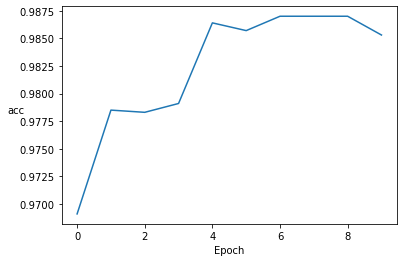

In [134]:
plt.plot(epoch_list, acc_list)
plt.xlabel('Epoch')
plt.ylabel('acc', rotation = 0)
plt.show()

### 2. 作业

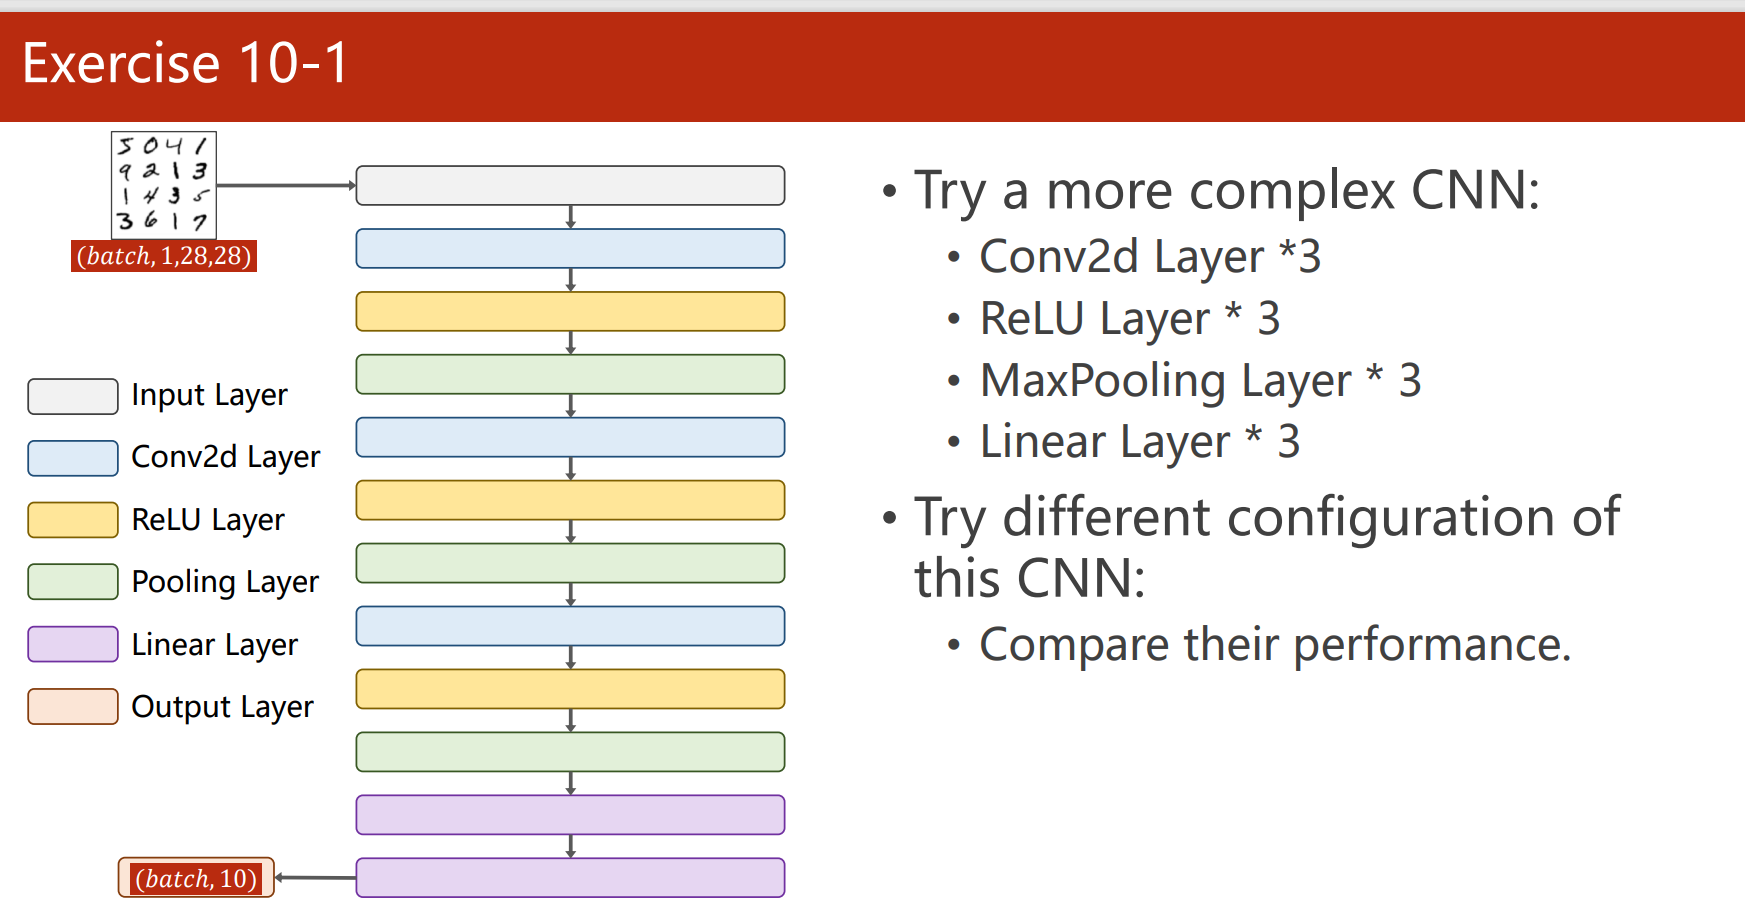

In [180]:
class NetModel(nn.Module):
    def __init__(self):
        super(NetModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.conv3 = nn.Conv2d(20, 40, kernel_size = 3)
        self.pooling = nn.MaxPool2d(2)
        self.linear1 = nn.Linear(40, 64)
        self.linear2 = nn.Linear(64, 32)
        self.linear3 = nn.Linear(32, 10)
    
    def forward(self, x):
        batch_size = x.size(0)
        x = self.pooling(F.relu(self.conv1(x)))
        x = self.pooling(F.relu(self.conv2(x)))
        x = self.pooling(F.relu(self.conv3(x)))
        x = x.view(batch_size, -1)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        return x

In [181]:
model = NetModel()

In [182]:
model

NetModel(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=40, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=10, bias=True)
)

In [183]:
loss_value = nn.CrossEntropyLoss()
loss_value

CrossEntropyLoss()

In [184]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01 ,momentum = 0.5)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.5
    nesterov: False
    weight_decay: 0
)

In [185]:
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        features, labels = data
        optimizer.zero_grad()
        output = model(features)
        loss = loss_value(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0

In [186]:
acc_list = []
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim = 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_list.append(correct/total)
    print('accuracy on test set: %d %% ' % (100*correct/total))

In [187]:
if __name__ == '__main__':
    epoch_list = []
    for epoch in range(10):
        epoch_list.append(epoch)
        train(epoch)
        test()

[1,   300] loss: 2.092
[1,   600] loss: 0.482
[1,   900] loss: 0.217
accuracy on test set: 95 % 
[2,   300] loss: 0.158
[2,   600] loss: 0.131
[2,   900] loss: 0.116
accuracy on test set: 97 % 
[3,   300] loss: 0.095
[3,   600] loss: 0.091
[3,   900] loss: 0.081
accuracy on test set: 98 % 
[4,   300] loss: 0.078
[4,   600] loss: 0.071
[4,   900] loss: 0.065
accuracy on test set: 98 % 
[5,   300] loss: 0.061
[5,   600] loss: 0.058
[5,   900] loss: 0.057
accuracy on test set: 98 % 
[6,   300] loss: 0.050
[6,   600] loss: 0.052
[6,   900] loss: 0.050
accuracy on test set: 98 % 
[7,   300] loss: 0.046
[7,   600] loss: 0.044
[7,   900] loss: 0.045
accuracy on test set: 98 % 
[8,   300] loss: 0.037
[8,   600] loss: 0.037
[8,   900] loss: 0.044
accuracy on test set: 98 % 
[9,   300] loss: 0.036
[9,   600] loss: 0.035
[9,   900] loss: 0.035
accuracy on test set: 98 % 
[10,   300] loss: 0.030
[10,   600] loss: 0.034
[10,   900] loss: 0.032
accuracy on test set: 98 % 


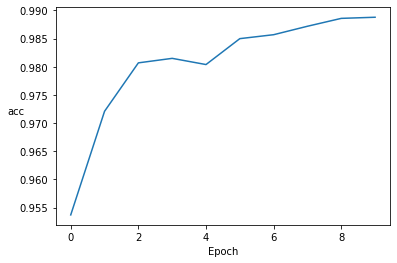

In [188]:
plt.plot(epoch_list, acc_list)
plt.xlabel('Epoch')
plt.ylabel('acc', rotation = 0)
plt.show()